# S-Cubes usage example

In [ ]:
from splusdata.scubes.core import SCubes

OBJNAME = 'NGC1365'
RA = 53.40155        # DEG
DEC = -36.1404       # DEG

FIELD='SPLUS-s28s33'
STAMP_SIZE = 1500    # PIX
VERBOSITY_LEVEL = 1

creator = SCubes(RA, DEC, FIELD, size=STAMP_SIZE, verbose=VERBOSITY_LEVEL)  #, username='XXXX', password='YYYY')
scube = creator.create_cube(objname=OBJNAME, force=True, return_scube=True)

###
### SCubes.create_cube() write_fits parameter defaults to false. 
### One can write the output FITS after create_cube() call using:
###
#cubepath = f'{OBJNAME}_cube.fits'
#creator.write(cubepath, overwrite=True)

NGC1365 @ SPLUS-s28s33 - Downloading:   0%|          | 0/12 [00:00<?, ?it/s]

[2025-08-27T10:59:35.720755] - : Downloading zp_model SPLUS-s28s33_u_zp_model.json


[2025-08-27T10:59:38.996702] - : Downloading zp_model SPLUS-s28s33_F378_zp_model.json


[2025-08-27T10:59:42.211056] - : Downloading zp_model SPLUS-s28s33_F395_zp_model.json


[2025-08-27T10:59:45.355243] - : Downloading zp_model SPLUS-s28s33_F410_zp_model.json


[2025-08-27T10:59:48.521346] - : Downloading zp_model SPLUS-s28s33_F430_zp_model.json


[2025-08-27T10:59:51.701757] - : Downloading zp_model SPLUS-s28s33_g_zp_model.json


[2025-08-27T10:59:54.930466] - : Downloading zp_model SPLUS-s28s33_F515_zp_model.json


[2025-08-27T10:59:58.045218] - : Downloading zp_model SPLUS-s28s33_r_zp_model.json


[2025-08-27T11:00:01.322328] - : Downloading zp_model SPLUS-s28s33_F660_zp_model.json


[2025-08-27T11:00:04.596879] - : Downloading zp_model SPLUS-s28s33_i_zp_model.json


[2025-08-27T11:00:07.703010] - : Downloading zp_model SPLUS-s28s33_F861_zp_model.json


[2025-08-27T11:00:10.871342] - : Downloading zp_model SPLUS-s28s33_z_zp_model.json


/home/lacerda/.pyenv/versions/dev/lib/python3.12/site-packages/splusdata/scubes/core.py:109: RuntimeWarning: divide by zero encountered in divide
  dataerr__byx = np.sqrt(1/weidata__byx + data__byx/gain__byx)
/home/lacerda/.pyenv/versions/dev/lib/python3.12/site-packages/splusdata/scubes/core.py:133: RuntimeWarning: cdelt will be ignored since cd is present
  nw.wcs.cdelt = [w.wcs.cdelt[0], w.wcs.cdelt[1], 1]
/home/lacerda/.pyenv/versions/dev/lib/python3.12/site-packages/splusdata/scubes/read.py:294: RuntimeWarning: divide by zero encountered in log10
  self.mag_arcsec2__byx = -2.5*np.log10(x)
/home/lacerda/.pyenv/versions/dev/lib/python3.12/site-packages/splusdata/scubes/read.py:294: RuntimeWarning: invalid value encountered in log10
  self.mag_arcsec2__byx = -2.5*np.log10(x)
/home/lacerda/.pyenv/versions/dev/lib/python3.12/site-packages/splusdata/scubes/read.py:295: RuntimeWarning: divide by zero encountered in divide
  self.emag_arcsec2__byx = (2.5*np.log10(np.exp(1)))*self.eflux__b

/tmp/ipykernel_42807/1443769516.py:11: RuntimeWarning: divide by zero encountered in log10
  logflux__yx = np.log10(scube.flux__byx[i]) + 18
/tmp/ipykernel_42807/1443769516.py:11: RuntimeWarning: invalid value encountered in log10
  logflux__yx = np.log10(scube.flux__byx[i]) + 18


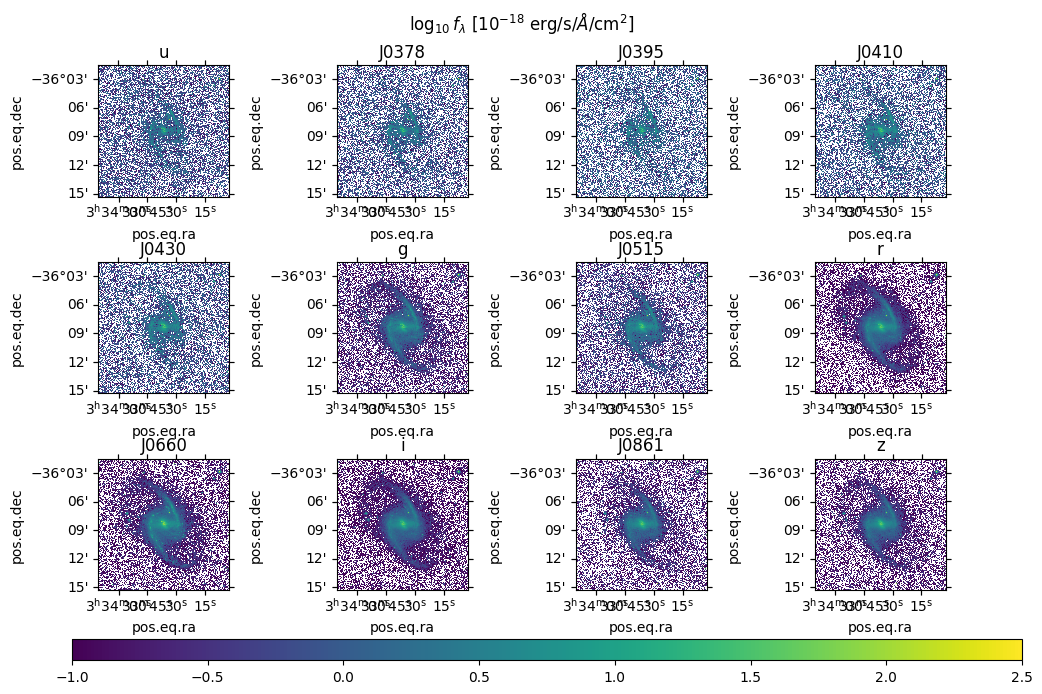

In [2]:
import numpy as np
import matplotlib.pyplot as plt

f = plt.figure()
f.set_size_inches(10, 7)

# plot filters
for i, filt in enumerate(scube.filters):
    ax = f.add_subplot(3, 4, i+1, projection=scube.wcs)
    ax.set_title(filt)
    logflux__yx = np.log10(scube.flux__byx[i]) + 18
    im = ax.imshow(logflux__yx, origin='lower', vmin=-1, vmax=2.5, interpolation='nearest')
    #ax.grid()

f.suptitle(r'$\log_{10} f_\lambda$ [10$^{-18}$ erg/s/$\AA$/cm$^2$]')
f.subplots_adjust(left=0.05, right=0.95, bottom=0.15, top=0.9, wspace=0.3, hspace=0.5)
left, bottom, width, height = 0.05, 0.05, 0.95, 0.03
cb_ax = f.add_axes([left, bottom, width, height])
f.colorbar(im, cax=cb_ax, location='bottom')

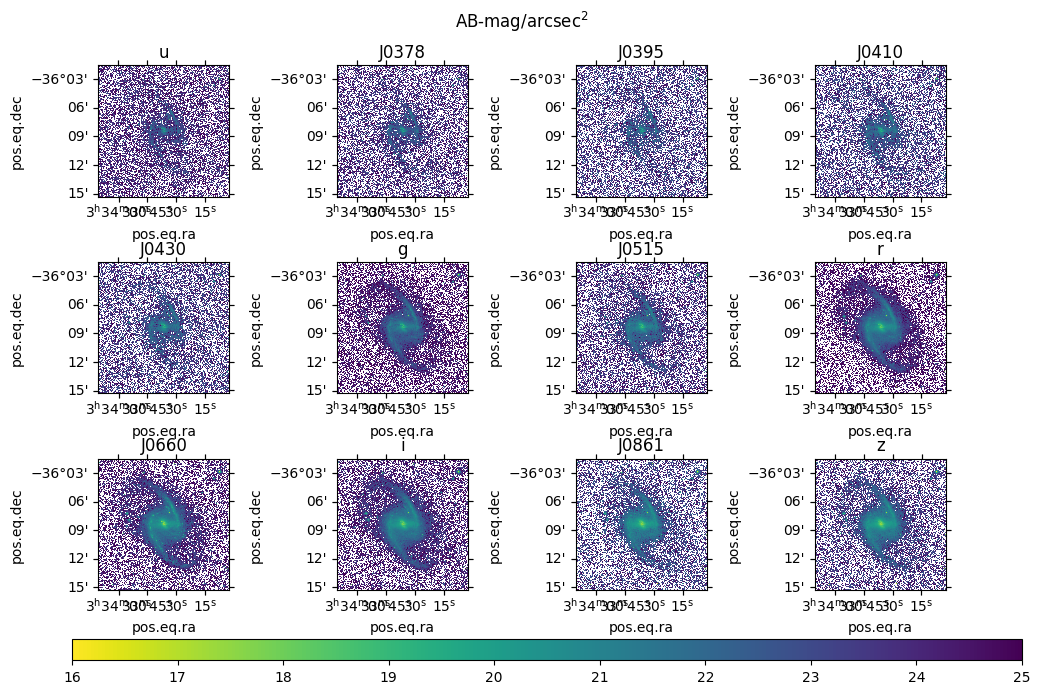

In [4]:
f = plt.figure()
f.set_size_inches(10, 7)

# plot filters
for i, filt in enumerate(scube.filters):
    ax = f.add_subplot(3, 4, i+1, projection=scube.wcs)
    ax.set_title(filt)
    im = ax.imshow(scube.mag_arcsec2__byx[i], origin='lower', vmin=16, vmax=25, interpolation='nearest', cmap='viridis_r')
    #ax.grid()

f.suptitle(r'AB-mag/arcsec$^2$')
f.subplots_adjust(left=0.05, right=0.95, bottom=0.15, top=0.9, wspace=0.3, hspace=0.5)
left, bottom, width, height = 0.05, 0.05, 0.95, 0.03
cb_ax = f.add_axes([left, bottom, width, height])
f.colorbar(im, cax=cb_ax, location='bottom')

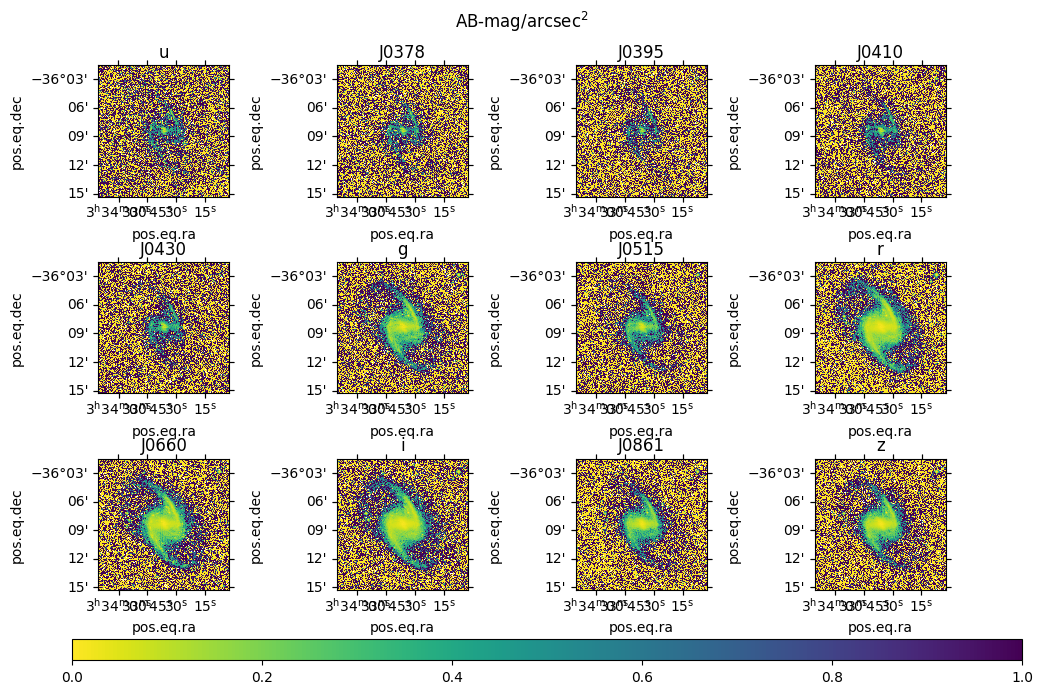

In [21]:
f = plt.figure()
f.set_size_inches(10, 7)

# plot filters
for i, filt in enumerate(scube.filters):
    ax = f.add_subplot(3, 4, i+1, projection=scube.wcs)
    ax.set_title(filt)
    im = ax.imshow(scube.emag_arcsec2__byx[i], origin='lower', vmin=0, vmax=1, interpolation='nearest', cmap='viridis_r')
    #ax.grid()

f.suptitle(r'AB-mag/arcsec$^2$')
f.subplots_adjust(left=0.05, right=0.95, bottom=0.15, top=0.9, wspace=0.3, hspace=0.5)
left, bottom, width, height = 0.05, 0.05, 0.95, 0.03
cb_ax = f.add_axes([left, bottom, width, height])
f.colorbar(im, cax=cb_ax, location='bottom')

## Lupton RGB

['u', 'J0378', 'J0395', 'J0410', 'J0430', 'g', 'J0515', 'r', 'J0660', 'i', 'J0861', 'z']


Text(0.5, 0.98, 'RGB examples')

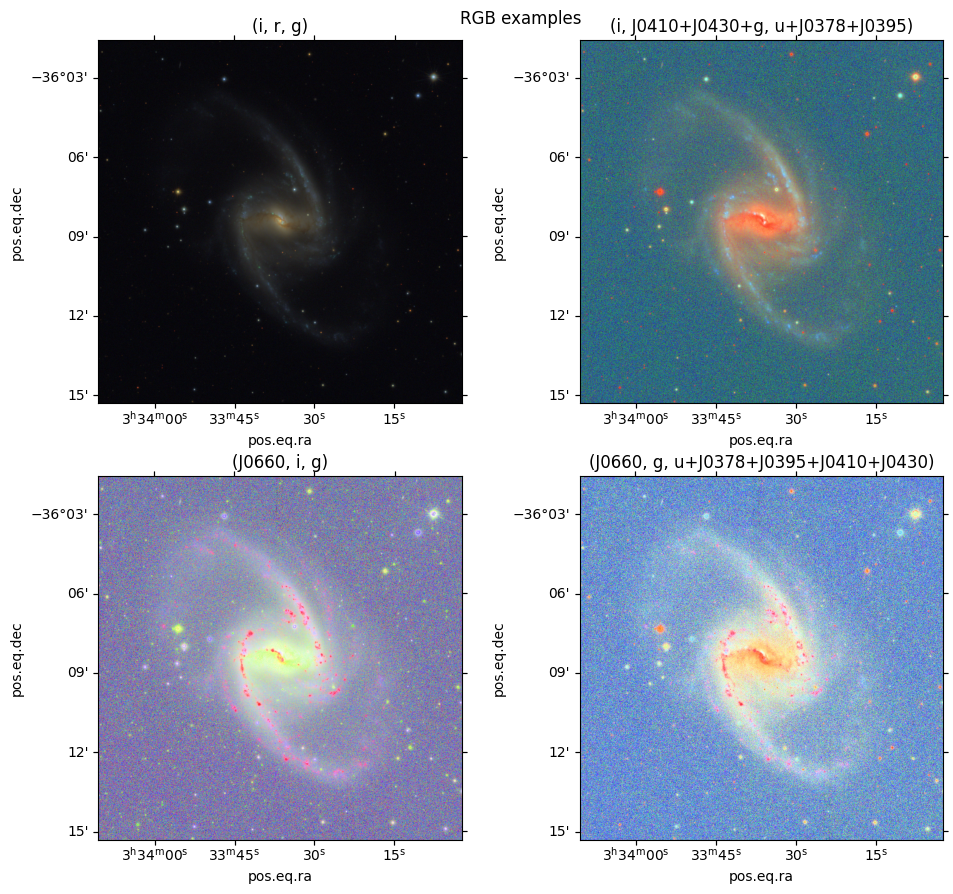

In [5]:
print(scube.filters)

rgb_dict = {
    '(i, r, g)': dict(
        rgb=['i', 'r', 'g'], Q=10, stretch=5, im_max=1,
    ),
    '(i, J0410+J0430+g, u+J0378+J0395)': dict(
        rgb=[9, ['J0410', 'J0430', 'g'], [0, 1, 2]], Q=8, stretch=3, im_max=10,
    ),
    '(J0660, i, g)': dict(
        rgb=[8, 9, 5], Q=10, stretch=5, im_max=255,
    ),
    '(J0660, g, u+J0378+J0395+J0410+J0430)': dict(
        rgb=[8, 5, [0, 1, 2, 3, 4]], Q=0, stretch=5, im_max=255,
    ),
}

f = plt.figure()
f.set_size_inches(10, 10)
for i, (k, v) in enumerate(rgb_dict.items()):
    ax = f.add_subplot(2, 2, i+1, projection=scube.wcs)
    ax.set_title(k)
    # make RGB using read_scube.lRGB_image()
    ax.imshow(scube.lRGB_image(**v), origin='lower')

f.subplots_adjust(left=0.05, right=0.95, bottom=0.15, top=0.95, wspace=0.15, hspace=0.2)
f.suptitle('RGB examples')

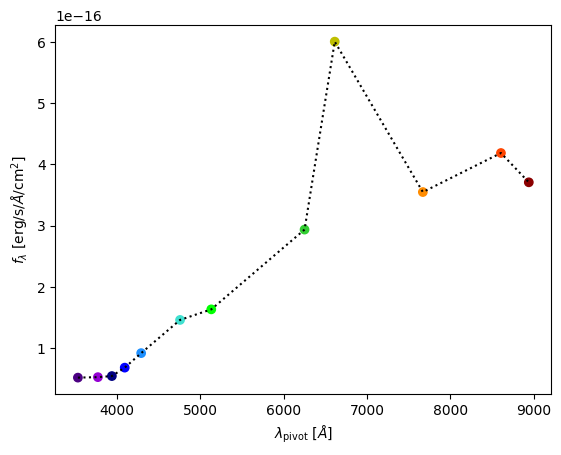

In [6]:
FILTER_COLORS = {
    'u': 'indigo',
    'J0378': 'darkviolet',
    'J0395': 'navy',
    'J0410': 'b',
    'J0430': 'dodgerblue',
    'g': 'turquoise',
    'J0515': 'lime',
    'r': 'limegreen',
    'J0660': 'y',
    'i': 'darkorange',
    'J0861': 'orangered',
    'z': 'darkred',
}

c = [FILTER_COLORS[x] for x in scube.filters]

plt.figure()
plt.ylabel(r'$f_\lambda$ [erg/s/$\AA$/cm$^2$]')
plt.xlabel(r'$\lambda_{\rm pivot}$ [$\AA$]')
x = scube.pivot_wave
y = scube.flux__byx[:, scube.i_y0, scube.i_x0]
plt.plot(x, y, 'k:')
plt.scatter(x, y, c=c)

Text(0.5, 1.0, 'J0660 radial profile')

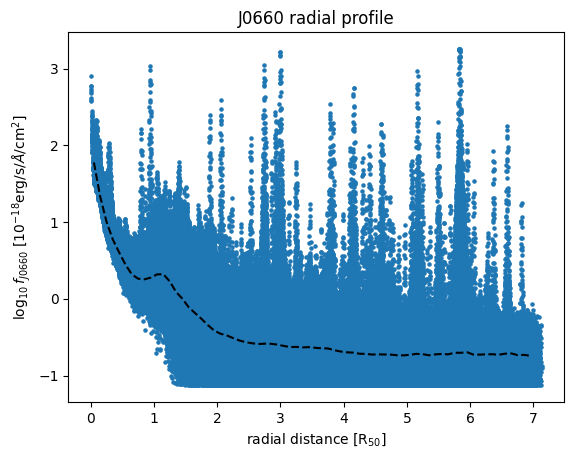

In [7]:
from splusdata.scubes.read import radial_profile, get_image_distance

r50 = 151.93536  # pix
a = 6.90e-2
b = 6.62e-2
pa = np.pi/2

bin_r = np.arange(0, 7 + 0.1, 0.1)  # r50
bins_center__r = 0.5*(bin_r[:-1] + bin_r[1:])
nbins = len(bins_center__r)
i_NIIHa = scube.get_filter_i('J0660')
#mag__yx = scube.mag_arcsec2__lyx[i_NIIHa]
flux__yx = scube.flux__byx[i_NIIHa]

# Radial profile of property
sel = scube.mag_arcsec2__byx[i_NIIHa] < 25
prop__r = radial_profile(flux__yx, bin_r=bin_r, x0=scube.x0, y0=scube.y0, rad_scale=r50, mode='median', pa=pa, ba=b/a, mask=sel)
pixel_distance__yx = get_image_distance(scube.weimask__yx.shape, scube.x0, scube.y0, pa, b/a)
plt.scatter(pixel_distance__yx[sel]/r50, np.ma.log10(flux__yx[sel]) + 18, s=5)

plt.plot(bins_center__r, np.log10(prop__r) + 18, 'k--')
plt.ylabel(r'$\log_{10} f_{J0660}$ [10$^{-18}$erg/s/$\AA$/cm$^2$]')
plt.xlabel(r'radial distance [R$_{50}$]')
plt.title('J0660 radial profile')